# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [212]:
# Let's start with importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [213]:
# Put all data into a dataframe

all_data = pd.read_excel('alldata.xlsx')

all_data.head()


,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58


Let's check basic info about columns and rows, how many there are, how many nan values there are

In [214]:
# Check the shape of the data

print(all_data.shape)

# There are 53 columns and 867 observations (candidates)

# Check if they are columns that have any nan value inside 

all_data.columns[all_data.isna().any()].tolist()

# There are no nan columns








(867, 53)


[]

In [215]:
# Listing all columns in the dataframe

all_data.columns

# There are 53 columns, 49 about the questions to answers and 4 about candidate information 

Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563', 'navn', 'parti', '1a', '1b', '2a',
       '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a',
       '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds',
       'alder'],
      dtype='object')

Lets focus on age column (alder)

In [216]:
# Let's check descriptive statistics of the column

display(all_data['alder'].describe())

# We notice immediately that the minimum age is 0, which is not possible. Let's check how many candidates and which candiate have age 0

candidates_wo_age = all_data.loc[all_data['alder'] == 0, ["navn"] ]

display(candidates_wo_age)


# 16 candidates have age 0. This is not possible.
# We could either impute value using the mean age without these observations, or delete the observations (for this part of data analysis only)
# Let's impute the values with the mean age of the candidates (rounded because it is an age)

mean_age = all_data.drop(index=candidates_wo_age.index)['alder'].mean().round(0)
print(mean_age)

# Let's impute the values with the mean age of the candidates

all_data['alder'] = all_data['alder'].replace(0, mean_age)




count    867.000000
mean      43.876586
std       14.386282
min        0.000000
25%       34.000000
50%       45.000000
75%       54.000000
max       79.000000
Name: alder, dtype: float64

,navn
13,Sarah Roued Thomsen
112,Dorthe Hindborg
127,Dorthe Hecht
128,David Schack Trappaud Rønne
190,Daniel Pinderup
201,Helle Bonnesen
267,Karlo Brondbjerg
322,Andreas Grosbøll
389,Roya Moore
403,Bjørn Brandenborg


45.0


### Before plotting lets create a mapping between a party and a color so that it can be later reused in plots

In [217]:
all_parties = all_data['parti'].unique()

party_colors = {
    "Socialdemokratiet": "red",
    "Radikale Venstre": "purple",
    "Det Konservative Folkeparti": "lightgreen",
    "Nye Borgerlige": "darkblue",
    "Socialistisk Folkeparti": "pink",
    "Liberal Alliance": "turquoise",
    "Kristendemokraterne": "grey",
    "Moderaterne": "lavender",
    "Dansk Folkeparti": "yellow",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "limegreen",
    "Enhedslisten": "orange",
    "Venstre": "blue",
    "Danmarksdemokraterne": "skyblue",
    "Alternativet": "green",
    "Løsgænger": "black"
}

count    867.000000
mean      44.707036
std       13.066343
min       18.000000
25%       35.000000
50%       45.000000
75%       54.000000
max       79.000000
Name: alder, dtype: float64

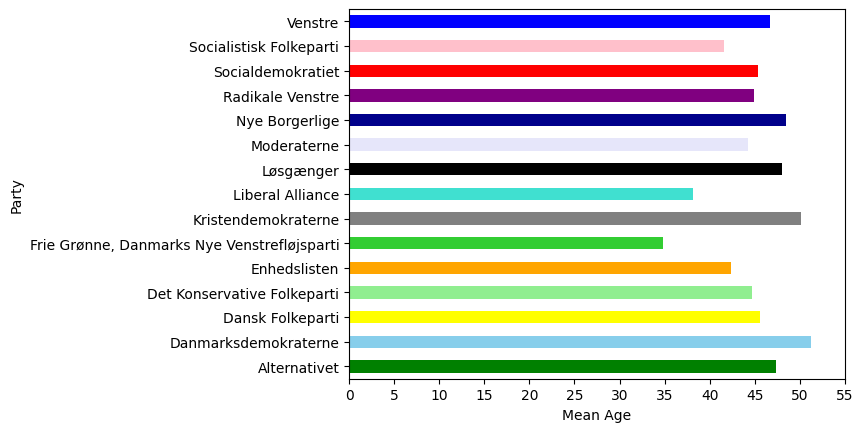

In [218]:
# Checking new descriptive statistics of the column

display(all_data['alder'].describe())


# Get mean age of candidates in each party

mean_age_by_parti = all_data.groupby('parti')['alder'].mean()


# Plotting the mean age of candidates in each party

mean_age_by_parti.plot(kind='barh', color=[party_colors[party] for party in mean_age_by_parti.index])
plt.xlabel('Mean Age')
plt.ylabel('Party')
plt.xticks(np.arange(0, 60, 5))
plt.show()


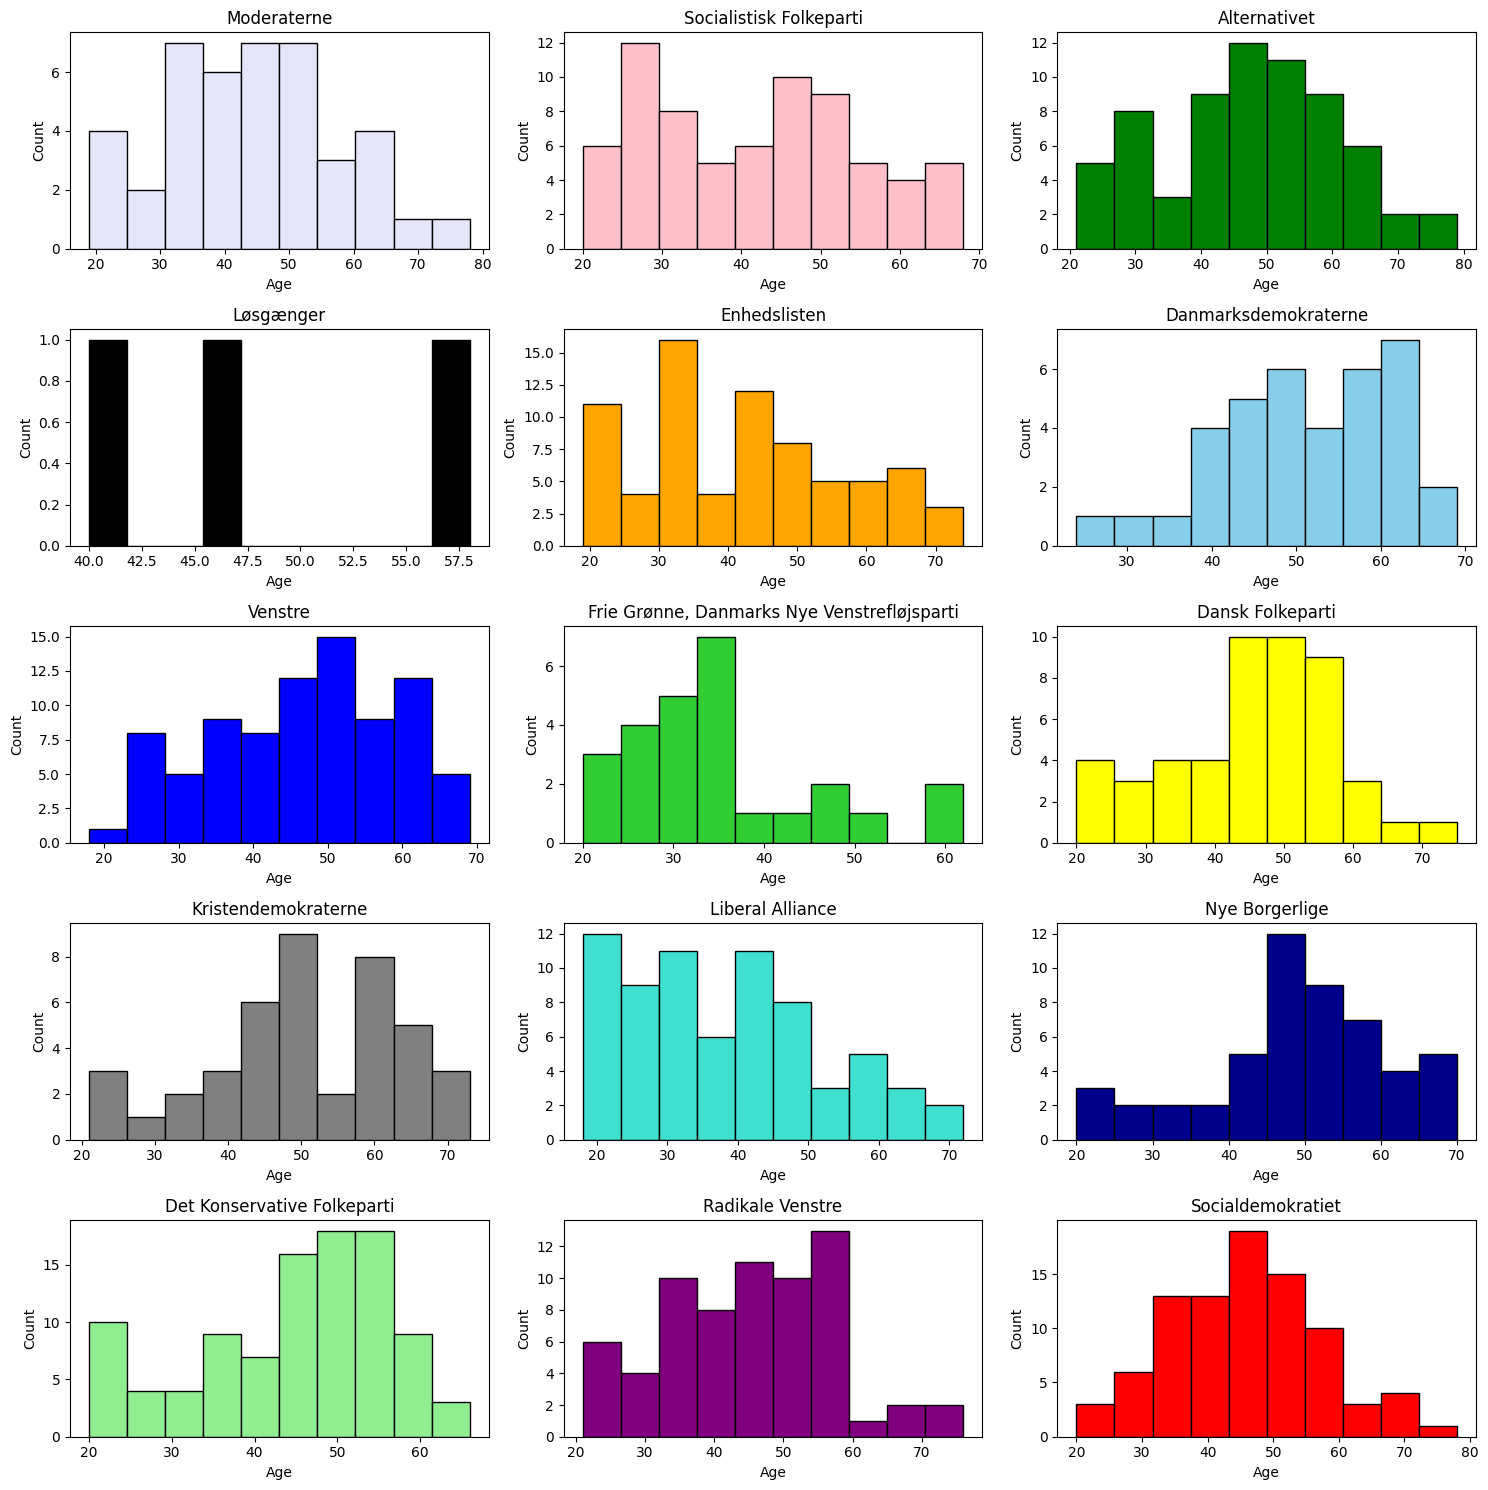

In [219]:
# Lets plot an age distribution of each party in the grid of plots

# Create grid of plots (5x3)
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
for i, party in enumerate(all_parties):
    # Choose a subplot for a party
    ax = axes[i // 3, i % 3]
    # Plot age distribution for a party on the chosen subplot
    all_data.loc[all_data['parti'] == party, 'alder'].plot(kind='hist', ax=ax, title=party, color=party_colors[party], edgecolor='black')
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

# To avoid overlapping of subplots
plt.tight_layout()
plt.show()


# We can very quickly see how the distributions are skewed for each party, showing whether more young or old candidates


### Overview of the most confident candidates

In [220]:
# For each candidate get number of answers where they were either stronhly agreein or strongly disagreeing (sort data descendinghly)
answers = all_data.drop(['alder', 'navn', 'parti', 'storkreds'], axis=1)
confidences = ((answers == 2) | (answers == -2)).sum(axis=1).sort_values(ascending=False)

# Top 5 "most confident" candidates and their information (confidence score and ratio attached as a new columns)

all_data.loc[confidences.head().index, ['navn', 'parti', 'storkreds']]\
    .assign(confidence_score=confidences.head(), confidence_ratio=confidences.head() / answers.shape[1])

# interestingly, there is a tie for the top 1 with one representative from left wing and one from right wing party
# and these people answered all the questions with strong confidence


,navn,parti,storkreds,confidence_score,confidence_ratio
505,Sarah Nørris,Enhedslisten,Sydjyllands Storkreds,49,1.000000
88,Søren Vanting,Det Konservative Folkeparti,Østjyllands Storkreds,49,1.000000
559,Kim Andkjær Doberck,Nye Borgerlige,Sydjyllands Storkreds,44,0.897959
152,Rashid Ali,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Københavns Storkreds,43,0.877551
44,Mohamed Abdikarim,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Østjyllands Storkreds,43,0.877551


### Number of candidates in each party

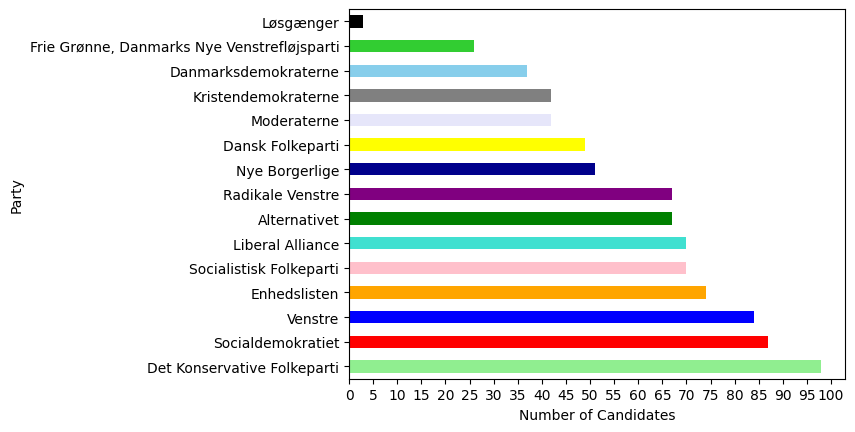

In [221]:
# plot number of candidates in each party

all_data['parti'].value_counts().plot(kind='barh', color=[party_colors[party] for party in all_data['parti'].value_counts().index])
plt.xlabel('Number of Candidates')
plt.ylabel('Party')
plt.xticks(np.arange(0, 101, 5))
plt.show()

# The biggest parties in denmark are Konservative, Socialdemokratiet and Venstre

### Intra party differences between candidates

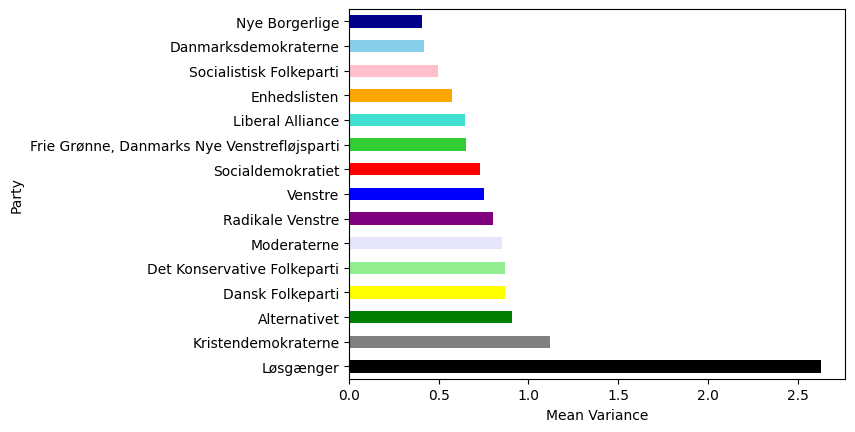

In [222]:
# To get which parties have the biggest internal differences, we can calculate variances of each party's answers

answers_variances = all_data.drop(['navn', 'alder', 'storkreds'], axis=1).groupby('parti').var()

# To get one number for each party, we can take the mean of these variances to get the average variance of answers in each party
mean_variances = answers_variances.mean(axis=1).sort_values(ascending=False)

# Plot for better visualization
mean_variances.plot(kind='barh', color=[party_colors[party] for party in mean_variances.index])
plt.xlabel('Mean Variance')
plt.ylabel('Party')
plt.show()

# There is one party that stands up when it comes to mean variance, but these are so called 'freelancer' candidates
# and they are not in any common party. So it makes sense that they have the highest variance in their answers, 
# because they are not bound to any party's ideology.

# Therefore the "true" party with the highest answers variance are Christian Democrats


### Inter party differences between candidates

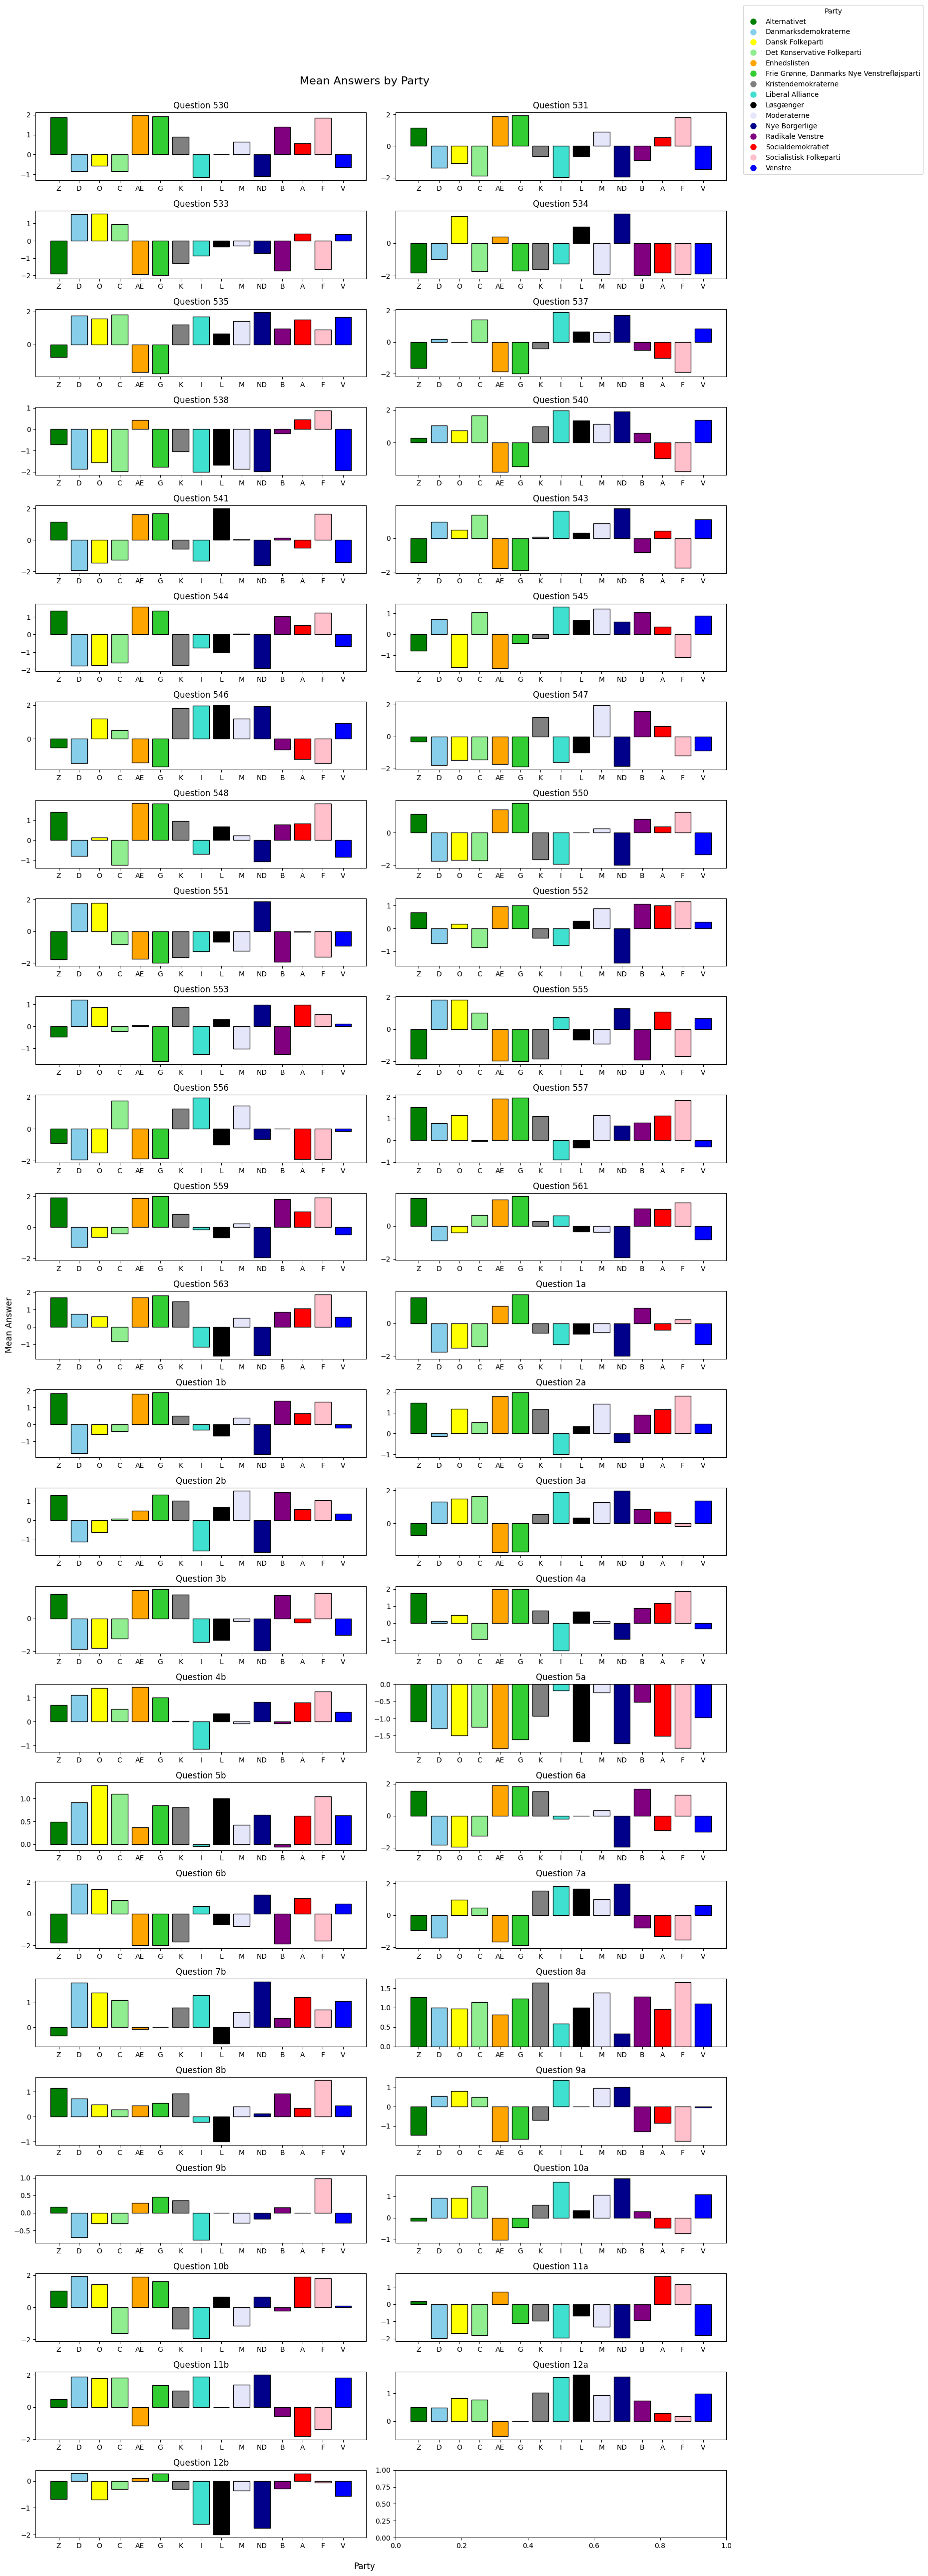

In [223]:
# To get inter party difference we will get the mean answers for all questions for each party
# and plot them against each other on subplot 

mean_answers_by_party = all_data.drop(['navn', 'alder', 'storkreds'], axis=1).groupby('parti').mean()


# For visibility instead of full party name we will use party abbreviation
party_abbreviations = {
    "Socialdemokratiet": "A",
    "Radikale Venstre": "B",
    "Det Konservative Folkeparti": "C",
    "Nye Borgerlige": "ND",
    "Socialistisk Folkeparti": "F",
    "Liberal Alliance": "I",
    "Kristendemokraterne": "K",
    "Moderaterne": "M",
    "Dansk Folkeparti": "O",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "G",
    "Enhedslisten": "AE",
    "Venstre": "V",
    "Danmarksdemokraterne": "D",
    "Alternativet": "Z",
    "Løsgænger": "L"
}

mapped_index = mean_answers_by_party.index.map(party_abbreviations)

# Lets create a subplot where we will plot the mean for each party for each question
fig, axes = plt.subplots(25, 2,figsize=(15,50))

for i, question in enumerate(mean_answers_by_party.columns):
    # In each subplot plot the mean answers for each party for certain question
    ax = axes[i // 2, i % 2]
    ax.bar(mapped_index, mean_answers_by_party[question], color=[party_colors[party] for party in mean_answers_by_party.index],
           edgecolor='black')
    ax.set_title(f'Question {question}')

# Create title, and main x and y labels
fig.suptitle('Mean Answers by Party', fontsize=16, y=1)
fig.supxlabel('Party', y=0.001)
fig.supylabel('Mean Answer')

# Create legend for party colors
legend_content = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=party_colors[party],
            markersize=10, label=party) for party in mean_answers_by_party.index]
fig.legend(handles=legend_content, loc='upper right', title='Party', bbox_to_anchor=(1.25, 1.03))

plt.tight_layout()
plt.show()



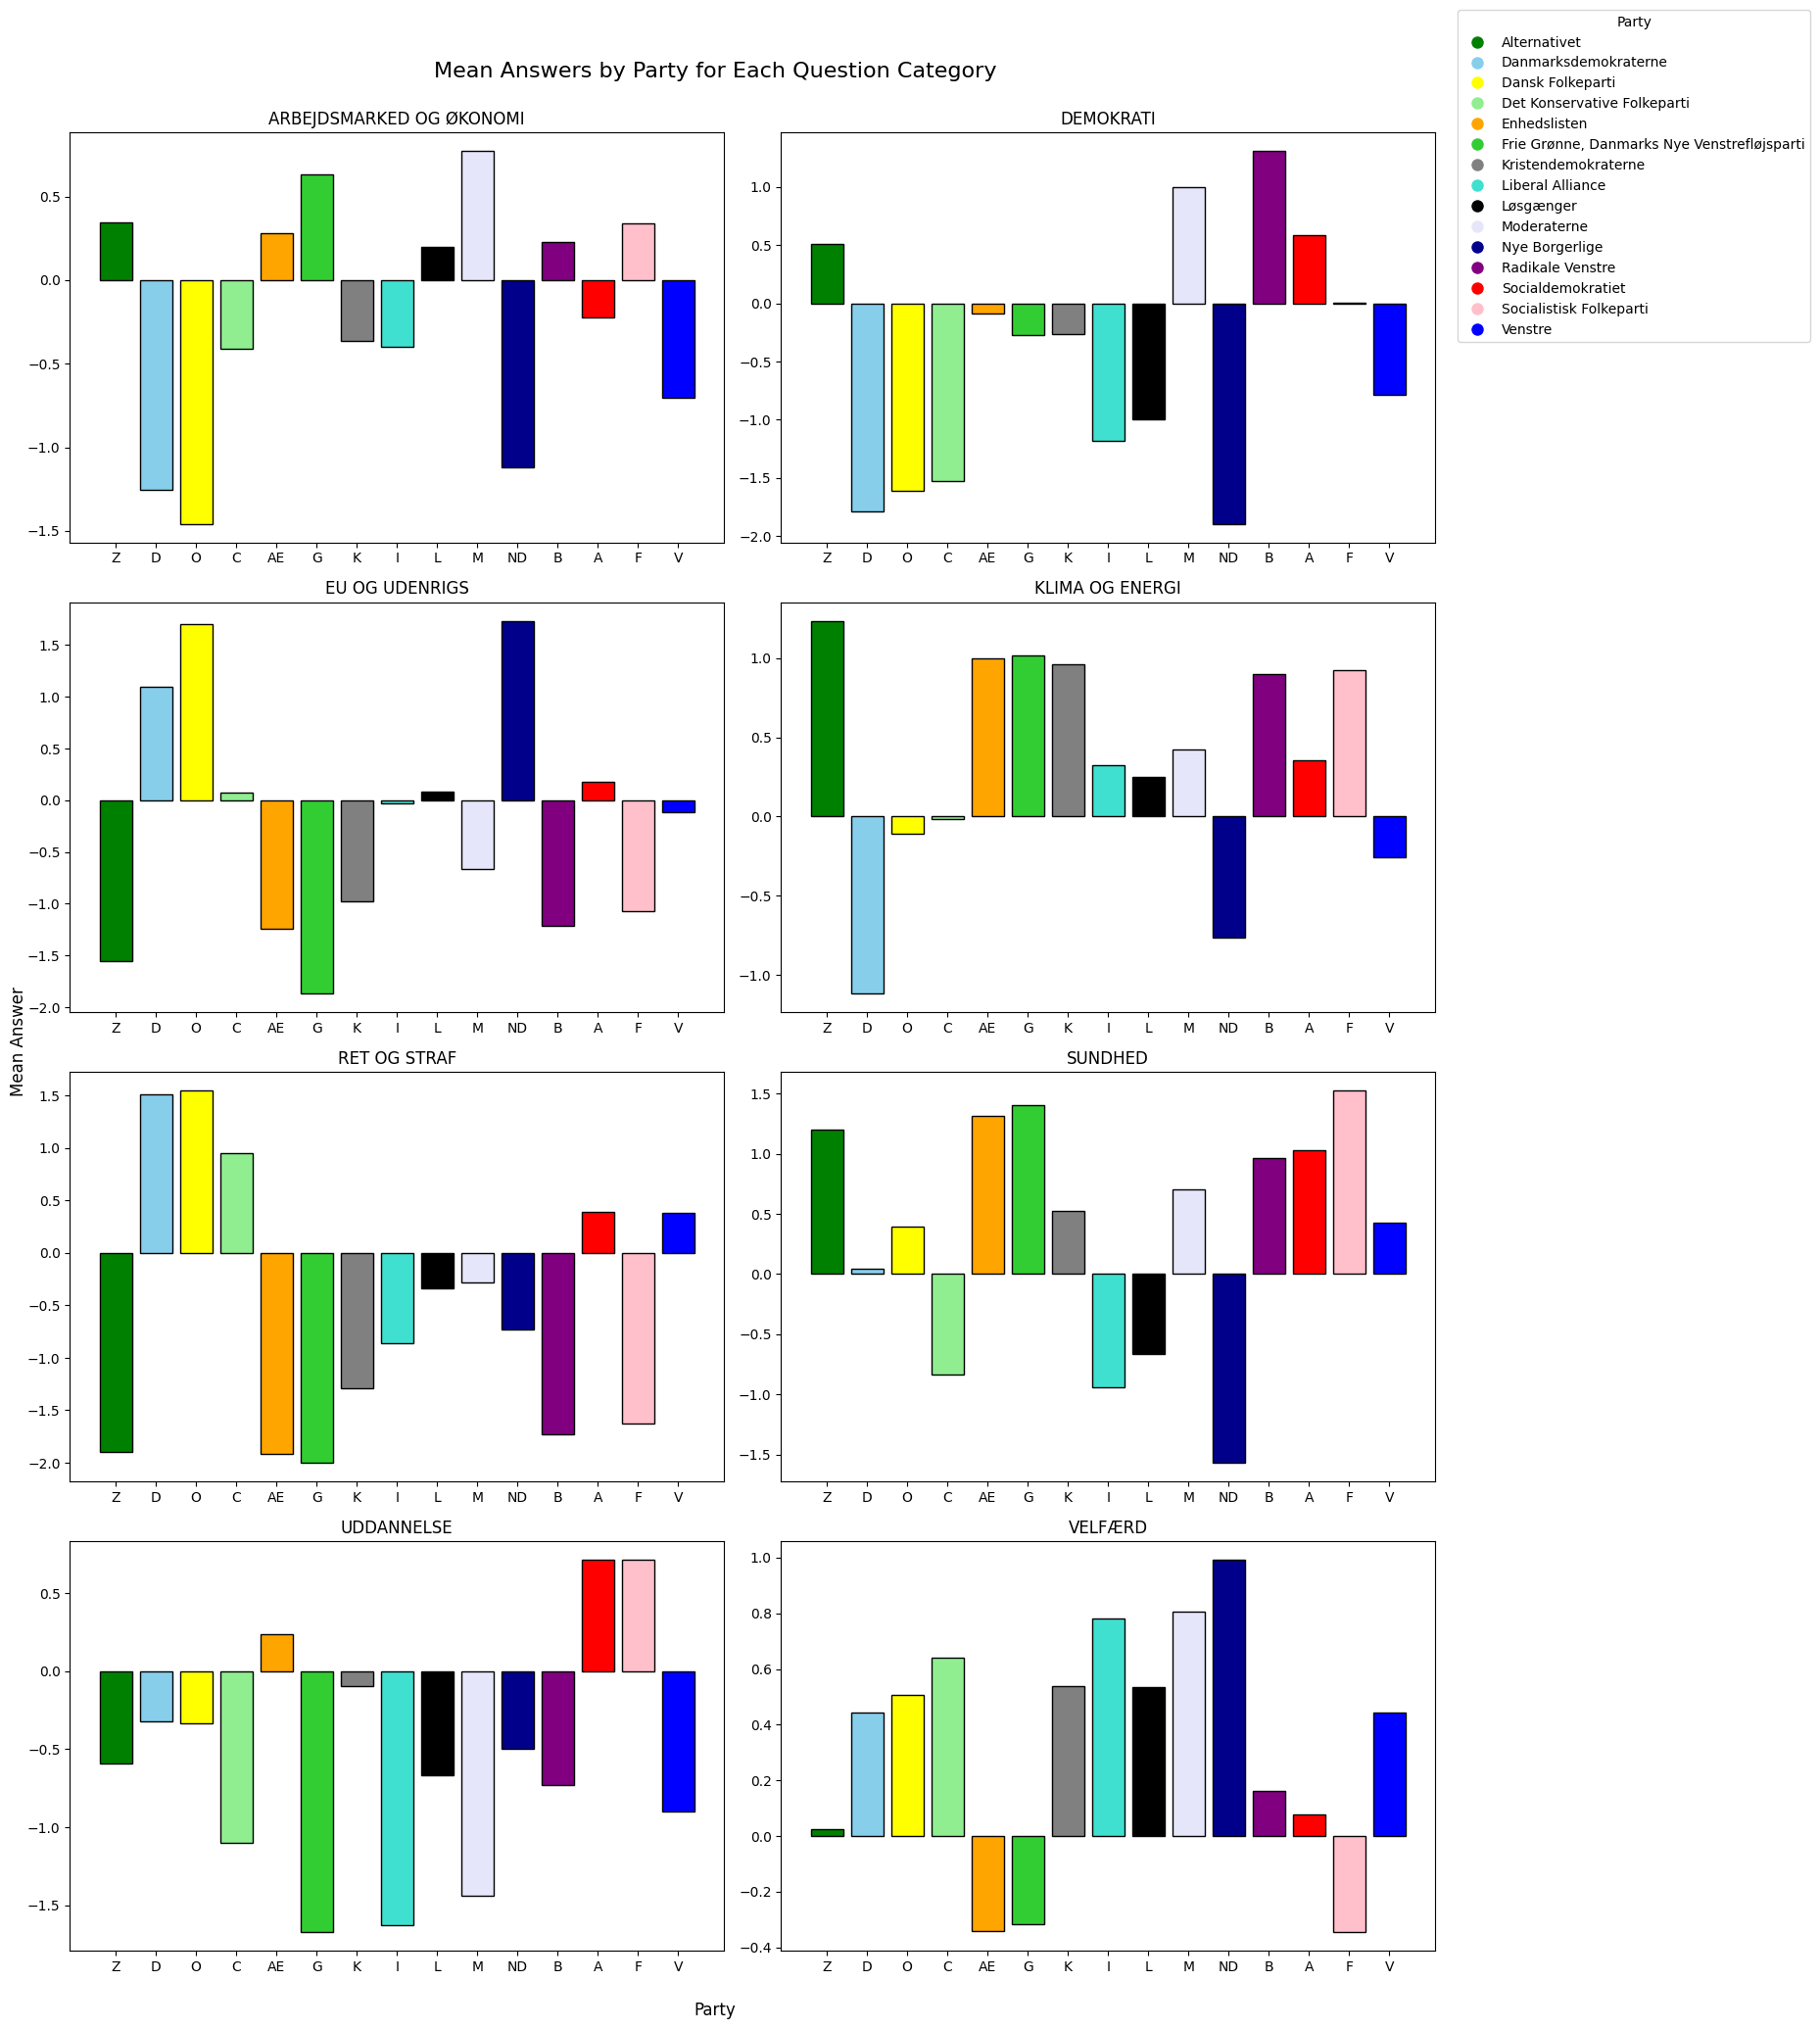

In [224]:
# questions from dr are group into categories so we will try to do basically the same plot as before
# but now show the mean answer for each party when it comes to each category

questions = pd.read_excel('drq.xlsx')
lists_of_ids = questions.groupby('Title')['ID'].apply(lambda x: x.astype(str).tolist())

# create df where we get questions for each category then we groupo  by party and get mean for each category

mean_answers_by_category = pd.DataFrame()
for category, ids in lists_of_ids.items():
    mean_answers_by_category[category] = all_data.loc[:, ids].mean(axis=1)


mean_answers_by_category = mean_answers_by_category.groupby(all_data['parti']).mean()

# Now we can create a plot

fig, axes = plt.subplots(4, 2,figsize=(15,20))
for i, category in enumerate(mean_answers_by_category.columns):
    ax = axes[i // 2, i % 2]
    ax.bar(mapped_index, mean_answers_by_category[category], color=[party_colors[party] for party in mean_answers_by_category.index],
    edgecolor='black')
    ax.set_title(category)

# Create title, and main x and y labels
fig.suptitle('Mean Answers by Party for Each Question Category', fontsize=16, y=1)
fig.supxlabel('Party', y=0.001)
fig.supylabel('Mean Answer')

# Create legend for party colors
legend_content = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=party_colors[party],
            markersize=10, label=party) for party in mean_answers_by_party.index]
fig.legend(handles=legend_content, loc='upper right', title='Party', bbox_to_anchor=(1.25, 1.03))

plt.tight_layout()
plt.show()




### Predicting party

In [225]:
# import necessary stugg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC

In [226]:
# We want to predict party only based on candidates beliefs
all_data_selected = all_data.drop(['alder', 'navn', 'storkreds'],axis=1)

# Create datasets
y = all_data_selected['parti']
X = all_data_selected.drop('parti', axis=1)

X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size=0.20, stratify=y_rest, random_state=42)

# Encode labels to get numbers instead of strings
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)
y_rest = le.transform(y_rest)

# No need to scale values are all in the same range of -2 to 2

In [227]:
# First let's try with Decision Tree

params_grid = {
    'max_depth': [3,6,9,12,15],
    'min_samples_split': [3,6,9,12],
    'max_leaf_nodes': [5,10,15, 20]
}

best_score = 0

for max_depth in params_grid['max_depth']:
    for min_samples_split in params_grid['min_samples_split']:
        for max_leaf_nodes in params_grid['max_leaf_nodes']:
            tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, max_leaf_nodes=max_leaf_nodes, random_state=42)
            tree.fit(X_train, y_train)
            val_score = tree.score(X_val, y_val)
            train_score = tree.score(X_train, y_train)
            # Second part of expression is to avoid overfitting by picking arbitrary threshold
            if val_score > best_score and abs(val_score - train_score) < 0.07:
                best_score = val_score
                best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'max_leaf_nodes': max_leaf_nodes}

print(f'Best validation score: {best_score}')
print(f'Best params: {best_params}')


Best validation score: 0.5899280575539568
Best params: {'max_depth': 6, 'min_samples_split': 3, 'max_leaf_nodes': 10}


In [228]:
# Create model with best parameters

tree = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], max_leaf_nodes=best_params['max_leaf_nodes'], random_state=42)
tree.fit(X_rest, y_rest)

print(f"Decision Tree train accuracy: {tree.score(X_train, y_train)}")
print(f"Decision Tree test accuracy: {tree.score(X_test, y_test)}")

Decision Tree train accuracy: 0.6064981949458483
Decision Tree test accuracy: 0.6264367816091954


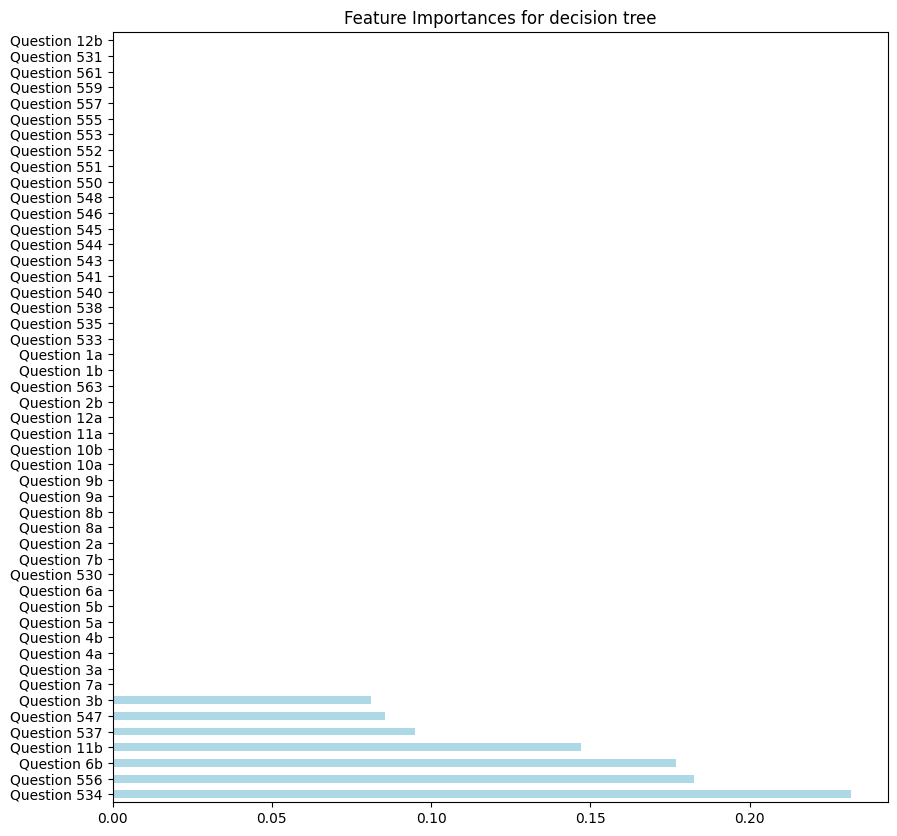

In [229]:
# Let's plot feature importances for decision tree
plt.figure(figsize=(10, 10))
indices = X.columns.map(lambda x: f'Question {x}')
feature_importances = pd.Series(tree.feature_importances_, index=indices).sort_values(ascending=False)
feature_importances.plot(kind='barh', color='lightblue')
plt.title('Feature Importances for decision tree')
plt.show()

# For simple tree with depth 6 only few features matter, but the most importan one is question 534 and then question 556


In [230]:
# Now random forest

params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,6,9,12],
    'max_leaf_nodes': [5,10,15, 20],
    "max_features": ["sqrt", "log2"]
}

best_score = 0
best_params = {}

for n_estimators in params_grid['n_estimators']:
    for max_depth in params_grid['max_depth']:
        for max_leaf_nodes in params_grid['max_leaf_nodes']:
            for max_features in params_grid['max_features']:
                rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, max_features=max_features, random_state=42)
                rf.fit(X_train, y_train)
                val_score = rf.score(X_val, y_val)
                train_score = rf.score(X_train, y_train)
                # Second part of expression is to avoid overfitting by picking arbitrary threshold
                if val_score > best_score and abs(val_score - train_score) < 0.7:
                    best_score = val_score
                    best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_leaf_nodes': max_leaf_nodes, 'max_features': max_features}

print(f'Best validation score: {best_score}')
print(f'Best params: {best_params}')

Best validation score: 0.8920863309352518
Best params: {'n_estimators': 200, 'max_depth': 12, 'max_leaf_nodes': 20, 'max_features': 'log2'}


In [231]:
# Create model with best parameters

rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], max_leaf_nodes=best_params['max_leaf_nodes'], max_features=best_params['max_features'], random_state=42)
rf.fit(X_rest, y_rest)

print(f"Random Forest train accuracy: {rf.score(X_train, y_train)}")
print(f"Random Forest test accuracy: {rf.score(X_test, y_test)}")


Random Forest train accuracy: 0.9187725631768953
Random Forest test accuracy: 0.9252873563218391


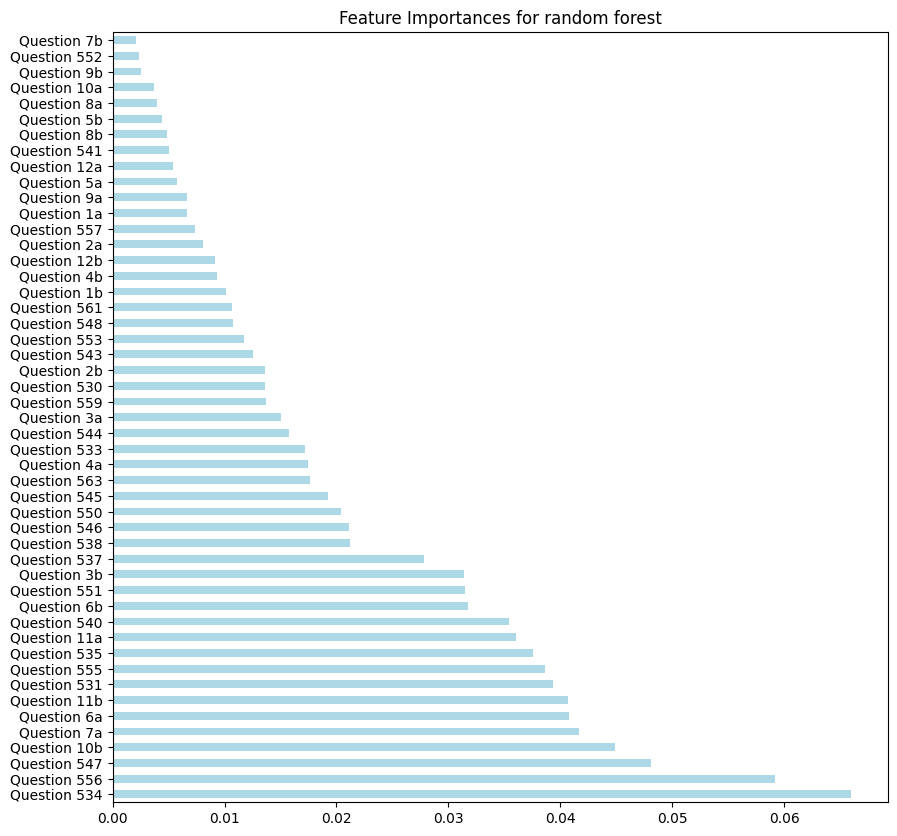

In [232]:
# Let's plot feature importances for random forest
plt.figure(figsize=(10, 10))
indices = X.columns.map(lambda x: f'Question {x}')
feature_importances = pd.Series(rf.feature_importances_, index=indices).sort_values(ascending=False)
feature_importances.plot(kind='barh', color='lightblue')
plt.title('Feature Importances for random forest')
plt.show()

# Questions 534 and 556 are the most important for random forest as well

In [233]:
# Now Gradient Boosting

params_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [3,6,9,12],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 1]
}

best_score = 0
best_params = {}

for n_estimators in params_grid['n_estimators']:
    for max_depth in params_grid['max_depth']:
        for learning_rate in params_grid['learning_rate']:
            gbtree = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
            gbtree.fit(X_train, y_train)
            val_score = gbtree.score(X_val, y_val)
            train_score = gbtree.score(X_train, y_train)
            # Second part of expression is to avoid overfitting by picking arbitrary threshold
            # (bigger overfit threshold because gradient boosting is prone to overfitting)
            if val_score > best_score and abs(val_score - train_score) < 0.16:
                best_score = val_score
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}

print(f'Best validation score: {best_score}')
print(f'Best params: {best_params}')


Best validation score: 0.841726618705036
Best params: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}


In [234]:
# Create model with best parameters

gbtree = GradientBoostingClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'], random_state=42)
gbtree.fit(X_rest, y_rest)

print(f"Gradient Boosting train accuracy: {gbtree.score(X_train, y_train)}")
print(f"Gradient Boosting test accuracy: {gbtree.score(X_test, y_test)}")


# Even though we tried to put overfittng antimeasures, gradient boosting still overfits quite a lot 


Gradient Boosting train accuracy: 1.0
Gradient Boosting test accuracy: 0.8333333333333334


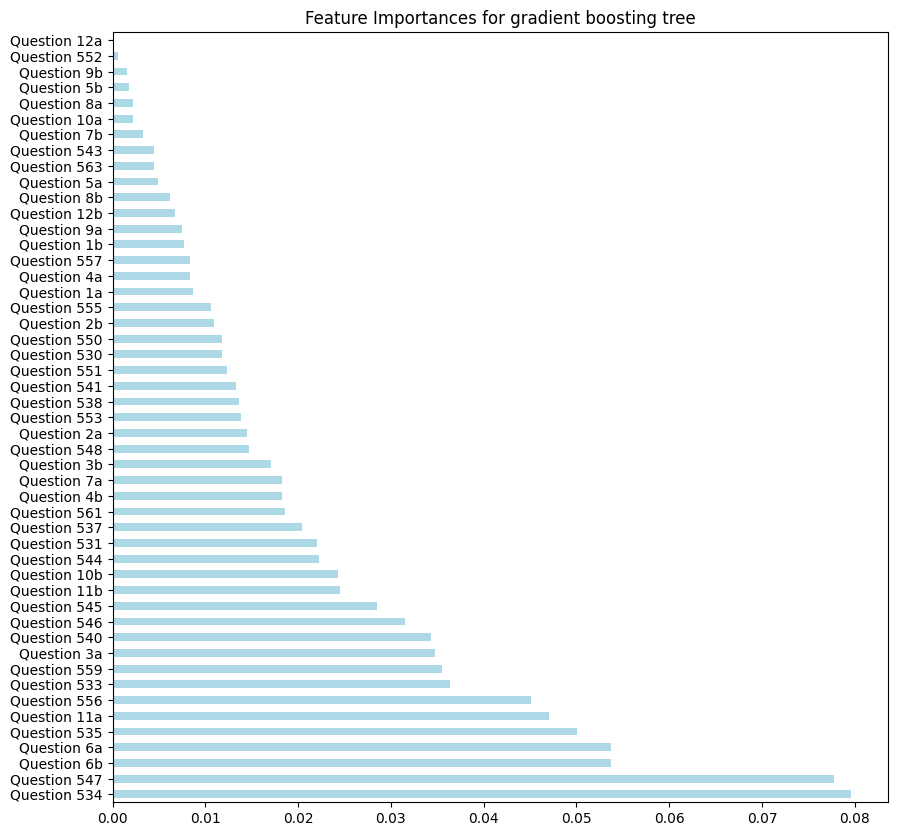

In [235]:
# Let's plot feature importances for gradient boosting tree 
plt.figure(figsize=(10, 10))
indices = X.columns.map(lambda x: f'Question {x}')
feature_importances = pd.Series(gbtree.feature_importances_, index=indices).sort_values(ascending=False)
feature_importances.plot(kind='barh', color='lightblue')
plt.title('Feature Importances for gradient boosting tree')
plt.show()

# There are 2 questions 547 and 534 that seem to be the most important for the gradient boosting tree

### Trees summary

Decision tree had the worst accuracy, probably there is still a room for improvemt when it comes to hyperparameter tuning
Especially because the max_depth was 6 and the number of features was 49, so most of the features were not used at all, what we can see in the feature importance plot

Random forest had very good accuracy, and test score was even better than train score, so it might be even underfitting, but it's hard to say without more hyperparameter tuning.
The importances plot shows that random forest uses all of the features, however the most important ones are the still the same as in decision tree plot

Gradient boosting had solid accuracy, but even with some tries to prevent overfitting and playing with hyperparameters, it was still overfitting, as we can see in the test score being lower than train score. Train score was 1, so the model just memorized the data, and it's not a good model. The feature importance plot shows that the most important features are the same as in the previous models

In [236]:
# KNN

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15,17,19],
    'metric': ['euclidean', 'manhattan', "minkowski", "chebyshev" ],
}

best_score = 0
best_params = {}

for n_neighbors in param_grid['n_neighbors']:
    for metric in param_grid['metric']:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        knn.fit(X_train, y_train)
        val_score = knn.score(X_val, y_val)
        train_score = knn.score(X_train, y_train)
        # Second part of expression is to avoid overfitting by picking arbitrary threshold
        if val_score > best_score and abs(val_score - train_score) < 0.07:
            best_score = val_score
            best_params = {'n_neighbors': n_neighbors, 'metric': metric}

print(f'Best validation score: {best_score}')
print(f'Best params: {best_params}')


Best validation score: 0.8920863309352518
Best params: {'n_neighbors': 11, 'metric': 'manhattan'}


In [237]:
# Create model with best parameters

knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
knn.fit(X_rest, y_rest)

print(f"KNN train accuracy: {knn.score(X_train, y_train)}")
print(f"KNN test accuracy: {knn.score(X_test, y_test)}")

KNN train accuracy: 0.8953068592057761
KNN test accuracy: 0.8850574712643678


In [238]:
# SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

best_score = 0
best_params = {}

for C in param_grid['C']:
    for kernel in param_grid['kernel']:
        svm = SVC(C=C, kernel=kernel, random_state=42)
        svm.fit(X_train, y_train)
        val_score = svm.score(X_val, y_val)
        train_score = svm.score(X_train, y_train)
        # Second part of expression is to avoid overfitting by picking arbitrary threshold
        if val_score > best_score and abs(val_score- train_score) < 0.07:
            best_score = val_score
            best_params = {'C': C, 'kernel': kernel}

print(f'Best validation score: {best_score}')
print(f'Best params: {best_params}')

Best validation score: 0.920863309352518
Best params: {'C': 1, 'kernel': 'rbf'}


In [239]:
# Create model with best parameters

svm = SVC(C=best_params['C'], kernel=best_params['kernel'], random_state=42)
svm.fit(X_train, y_train)

print(f"SVC train accuracy: {svm.score(X_train, y_train)}")
print(f"SVC test accuracy: {svm.score(X_test, y_test)}")


SVC train accuracy: 0.9729241877256317
SVC test accuracy: 0.9252873563218391


### "Checking" which candidates are in the wrong party


We will use our random forest model (it had the best accuracy), to see for which candidates the model predicted the wrong party. We will use the test set, and we will compare the predicted party with the actual party. That way we will see what party it thinks is the best for the candidate.

In [240]:
y_pred = rf.predict(X_test)

# Get wrong predictions
wrong_predictions = y_pred != y_test

# index X_test with wrong predictions to get indices of records in all_data and then get the names and parties of the candidates
wrong_predictions_df = all_data.loc[X_test[wrong_predictions].index, ['navn', 'parti']]

# Add the predictions to the df
wrong_predictions_df['prediction'] = le.inverse_transform(y_pred[wrong_predictions])

wrong_predictions_df.columns = ['Name', 'Actual Party', 'Predicted Party']

wrong_predictions_df



,Name,Actual Party,Predicted Party
763,Niels Martin Viuff,Det Konservative Folkeparti,Venstre
823,Esben Frette Johnsen,Kristendemokraterne,Radikale Venstre
92,Anders Krojgaard Lund,Det Konservative Folkeparti,Liberal Alliance
42,Ali Khatib,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Alternativet
219,Nikoline Prehn,Socialdemokratiet,Socialistisk Folkeparti
519,Kasper B. Mundt,Venstre,Nye Borgerlige
8,Chresten H. Ibsen,Løsgænger,Radikale Venstre
43,Sara Hvidbak Grouleff,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Alternativet
782,Thomas Lindqvist,Alternativet,Socialistisk Folkeparti
289,Alexander Klitgaard,Det Konservative Folkeparti,Liberal Alliance
